In [4]:
%env HF_TOKEN=YOUR_TOKEN_HERE

env: HF_TOKEN=YOUR_TOKEN_HERE


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

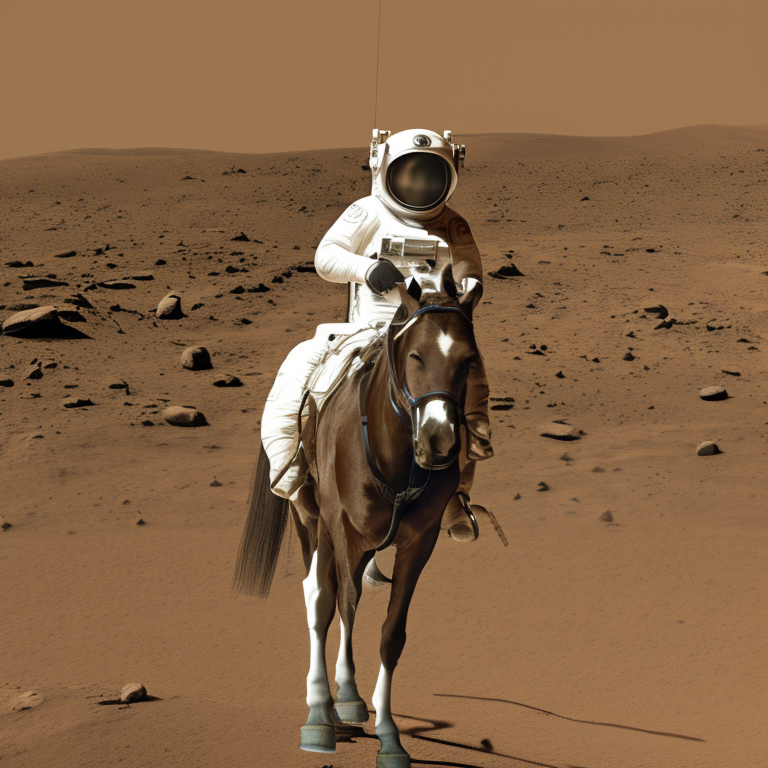

In [3]:
import os
import torch
import transformers

from torch import autocast
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

HF_TOKEN =  os.environ.get("HF_TOKEN")

model_id = "stabilityai/stable-diffusion-2"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    scheduler=scheduler,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=HF_TOKEN
)
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()

prompt = "a photo of an astronaught riding a horse on mars"
with autocast("cuda"):
    image = pipe(prompt).images[0]  

display(image)